In [1]:
import re
import cv2
import pytesseract
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from utils import ocr_util
from utils import img_util

CWD_PATH = os.getcwd()
TEST_IMAGE_PATH = os.path.join(CWD_PATH, 'test_images')

In [2]:
def preprocess(image, scale=1):
    #gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    resized = cv2.resize(gray,(image.shape[1]//scale,image.shape[0]//scale))
    #blur = cv2.blur(resized,(5,5))
    #thresh = cv2.threshold(resized, 100, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]

    return resized

def dilate(image):
    kernel = np.ones((2,2),dtype=np.uint8)
    return cv2.dilate(image, kernel, iterations = 10)

    
#erosion
def erode(image):
    kernel = np.ones((1,1),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

def reverse_color(img):
    return cv2.bitwise_not(img)

def opening(image):
    kernel = np.ones((1, 1), np.uint8) 
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)


def getScale(image):
    height_scale = image.shape[0] // 540
    width_scale = image.shape[1] // 860
    return height_scale, width_scale

def sharpen(image):
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    return cv2.filter2D(image, -1, kernel)    


def imshow(src,title='title'):
    plt.title(title)
    plt.imshow(src)
    plt.show() 
    
def crop_name_and_address(src):
    return src[250: ,0:500]
    
def crop_nric(src):
    return src[75:200,0:400]

def crop_gender(src):
    return src[300:,550:]

def detect_chip(src):
    #blur =  cv2.medianBlur(src,5)
    denoise = ocr_util.denoise(src,scale=2)
    binary = cv2.threshold(denoise, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]    
    cnts,_ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnt = max(cnts, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(cnt)   
    return (x, y, w, h)

def crop_chip(src):
    chip = src[130:330,50:400]
    x, y, w, h = detect_chip(chip)
    return chip[y:y+h, x:x+w]

def denoise(src, base_kernel=23, scale=1, base_sigma=8, h=51):
    kernel_size = (base_kernel * scale) + (1 if scale % 2 == 0 else 0)
    sigma = base_sigma * scale
    thresh = cv2.adaptiveThreshold(src,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,kernel_size, sigma)
    return cv2.fastNlMeansDenoising(thresh, None, h, 7, 21)  

In [3]:
def drawbox(img):
    d = pytesseract.image_to_data(img, output_type=pytesseract.Output.DICT)
    n_boxes = len(d['text'])
    boxes = img
    for i in range(n_boxes):
        if int(d['conf'][i]) > 60:
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            boxes = cv2.rectangle(boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)   
            
    plt.imshow(boxes)
    plt.show()

with base width,  860


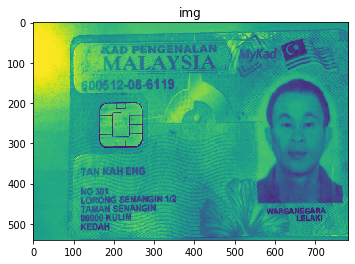

scale : 2


In [4]:
#img_file = os.path.join(TEST_IMAGE_PATH,'ocr/myhi00049.jpg')
img_file = '/home/williamkhoo/Desktop/projects/clean_data/ocr_test/028.jpg'
image = cv2.imread(img_file, cv2.IMREAD_COLOR)
#image = hed_util.crop_image(net, image)
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
img = cv2.resize(gray,(860,540),cv2.INTER_AREA)

img = img_util.try_crop_image(img, base_width=860, threshold=0.3, iterations=3)
imshow(img, 'img')
scale = image.shape[1] // 860
scale = 2 if scale == 0 else scale
print('scale :', scale)

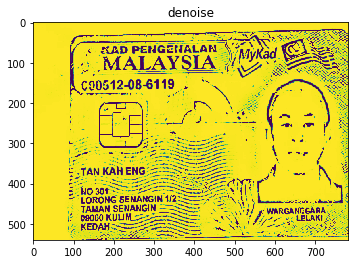

In [5]:
#blur = cv2.GaussianBlur(img, (3,3), 0)
#blur = cv2.medianBlur(img,1)
denoise = ocr_util.denoise(img,25, 1, 11)
imshow(denoise, 'denoise')

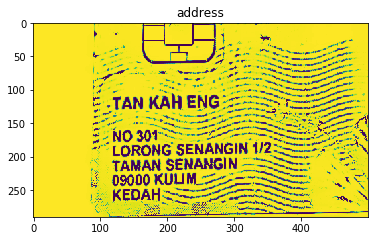

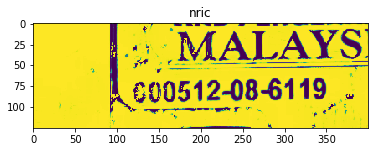

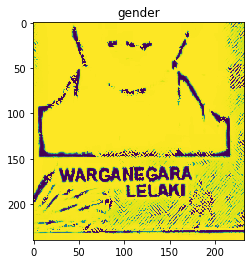

address:  we Ca a eae
ice ae et
Le TE EEE
5 TAN KAW ENG 22-5 See
Bes ee eC
2 NO 3012 oN
=" LORONG SENANGIN 1/22o-o=5-N
 TAMAN SENANGIN =.
x (=
ee KEDAN SS ON

nric:  «: .MALAYS
00512-08619, -

gender:  \ rd 4
A ad \ 4

i AROANEGARS a
tae hay! y

me LOLI LIES



In [6]:
address = crop_name_and_address(denoise)
imshow(address, 'address')
nric = crop_nric(denoise)
imshow(nric, 'nric')
gender = crop_gender(denoise)
imshow(gender, 'gender')

custom_config = r'--oem 3 --psm 6'
print('address: ' ,pytesseract.image_to_string(address,config = custom_config))
print('nric: ' ,pytesseract.image_to_string(nric,config = custom_config))
print('gender: ' ,pytesseract.image_to_string(gender,config = custom_config))


scale  (3, 3)


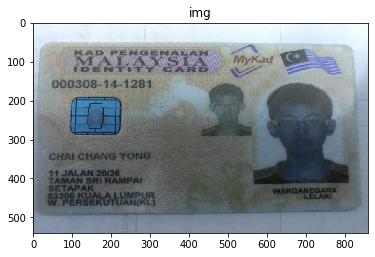

cx: 44, cy: 61, cw: 134, ch: 99


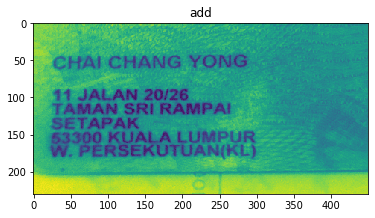

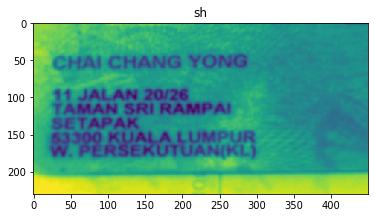

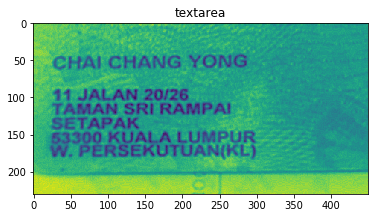

address:  CHAICHANG YONG.
TAWAMSRIRAMPAL
SETAPAK ~ e ae
WPERSEROTUANKI)



In [452]:
#img_file = os.path.join(TEST_IMAGE_PATH,'(9)00427.jpg')
img_file = '/home/williamkhoo/Desktop/projects/clean_data/ocr_test/004.jpg'
image = cv2.imread(img_file, cv2.IMREAD_COLOR)
height_scale, width_scale = getScale(image)
print('scale ', scale)
image = img_util.try_crop_image(image, threshold=0.3, iterations=3)
img = cv2.resize(image,(860,540),cv2.INTER_AREA)
#card = img[0:330,0:300]
imshow(img, 'img')
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
#imshow(gray, 'gray')
y1 = 130
y2 = 350
x1 = 50
x2 = 400
card = gray[y1:y2,x1:x2]
#imshow(card, 'card')
cx1,cy1,cw1,ch1 = detect_chip(card)
print('cx: {}, cy: {}, cw: {}, ch: {}'.format(cx1,cy1,cw1,ch1))
cropped = card[cy1:cy1+ch1,cx1:cx1+cw1]
#imshow(cropped, 'cropped')
y_start = y1+cy1+ch1
x_start = x1+cx1-80
x_start = x_start if x_start > 0 else 0
add = gray[y_start:y_start+230, x_start:x_start+450]
add2 = add.copy()
imshow(add, 'add')
#sh = cv2.medianBlur(add2, 3)

sh = cv2.GaussianBlur(add2, (7,7), 0)
imshow(sh, 'sh')
textarea = img_util.sharpen(sh)
imshow(textarea, 'textarea')
#noise = denoise(sh,base_kernel=21, scale=1, base_sigma=10, h=21)
#imshow(noise, 'noise')
custom_config = r'--oem 3 --psm 6'
print('address: ' ,pytesseract.image_to_string(textarea,config = custom_config))

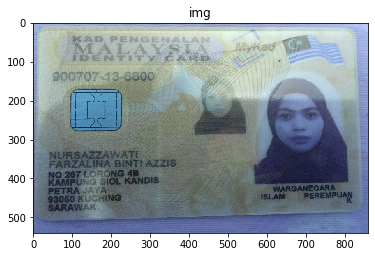

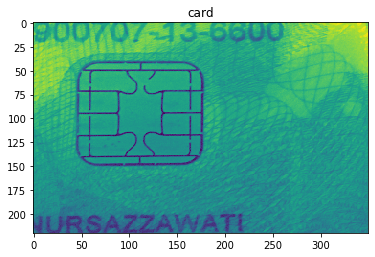

cx: 49, cy: 51, cw: 130, ch: 99


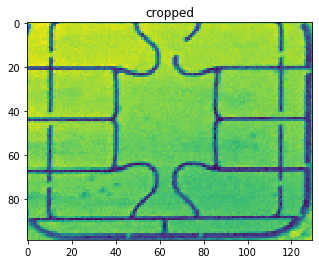

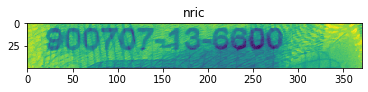

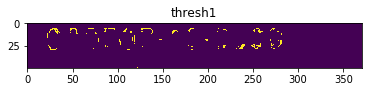

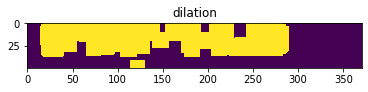

In [28]:
img_file = os.path.join(TEST_IMAGE_PATH,'(9)00464.jpg')
image = cv2.imread(img_file, cv2.IMREAD_COLOR)
image = img_util.try_crop_image(image, base_width=860, threshold=0.3, iterations=3)
img = cv2.resize(image,(860,540),cv2.INTER_AREA)
#card = img[0:330,0:300]
imshow(img, 'img')
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
#imshow(gray, 'gray')
y1 = 130
y2 = 350
x1 = 50
x2 = 400
card = gray[y1:y2,x1:x2]
imshow(card, 'card')
cx1,cy1,cw1,ch1 = detect_chip(card)
print('cx: {}, cy: {}, cw: {}, ch: {}'.format(cx1,cy1,cw1,ch1))
cropped = card[cy1:cy1+ch1,cx1:cx1+cw1]
imshow(cropped, 'cropped')
end_y = y1+cy1-10
x_start = x1+cx1-70
x_start = x_start if x_start > 0 else 0
add = gray[end_y-50:end_y, x_start:400]
imshow(add, 'nric')
blur = cv2.medianBlur(add,7)
thresh1 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY_INV,11, 9)
#ret, thresh1 = cv2.threshold(thresh1, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU) 
#ret, t = cv2.threshold(cropped, 150, 255, cv2.THRESH_BINARY) 
imshow(thresh1, 'thresh1')
# Specify structure shape and kernel size.  
# Kernel size increases or decreases the area  
# of the rectangle to be detected. 
# A smaller value like (10, 10) will detect  
# each word instead of a sentence. 
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (17, 17)) 
  
# Appplying dilation on the threshold image 
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1) 
imshow(dilation, 'dilation')

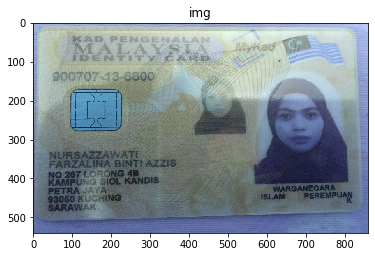

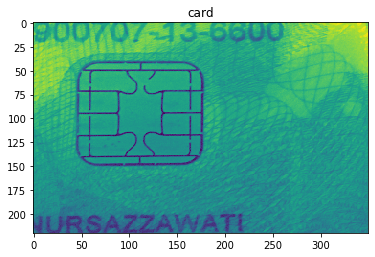

cx: 49, cy: 51, cw: 130, ch: 99


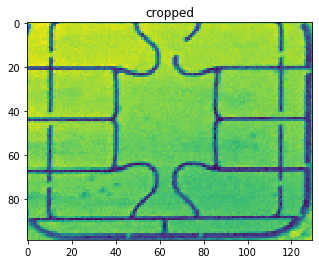

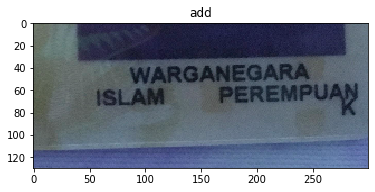

In [9]:
img_file = os.path.join(TEST_IMAGE_PATH,'(9)00464.jpg')
image = cv2.imread(img_file, cv2.IMREAD_COLOR)
image = img_util.try_crop_image(image, threshold=0.3, iterations=3)
img = cv2.resize(image,(860,540),cv2.INTER_AREA)
#card = img[0:330,0:300]
imshow(img, 'img')
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
#imshow(gray, 'gray')
y1 = 130
y2 = 350
x1 = 50
x2 = 400
card = gray[y1:y2,x1:x2]
imshow(card, 'card')
cx1,cy1,cw1,ch1 = detect_chip(card)
print('cx: {}, cy: {}, cw: {}, ch: {}'.format(cx1,cy1,cw1,ch1))
cropped = card[cy1:cy1+ch1,cx1:cx1+cw1]
imshow(cropped, 'cropped')
y_start = y1+cy1+ch1
x_start = x1+cx1-70
x_start = x_start if x_start > 0 else 0
add = img[y_start+100:y_start+230, x_start+500:x_start+800]
imshow(add, 'add')

with base width,  860


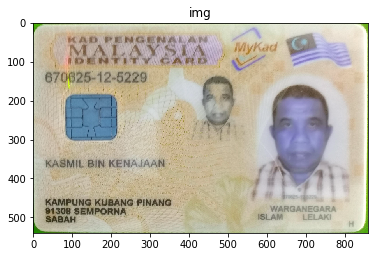

cx: 33, cy: 55, cw: 133, ch: 119
0.9754098360655737


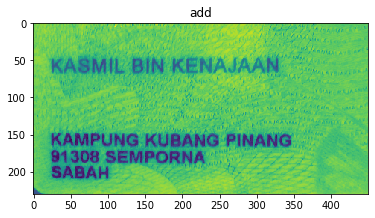

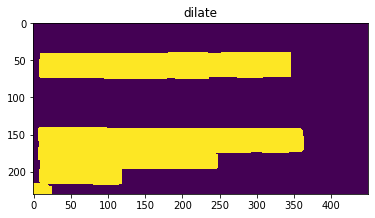

cx: 0, cy: 140, cw: 364, ch: 90
cx: 8, cy: 40, cw: 339, ch: 36


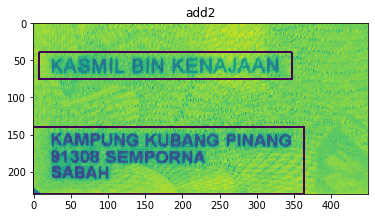

In [7]:
#img_file = os.path.join(TEST_IMAGE_PATH,'(9)00427.jpg')
img_file = '/home/williamkhoo/Desktop/projects/clean_data/ocr_test/008.jpg'
image = cv2.imread(img_file, cv2.IMREAD_COLOR)
image = img_util.try_crop_image(image, threshold=0.3, iterations=3)
height_scale, width_scale = getScale(image)
#print('image scale ', width_scale)
img = cv2.resize(image,(860,540),cv2.INTER_AREA)
#card = img[0:330,0:300]
imshow(img, 'img')
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
standard_chip_height = 122
#imshow(gray, 'gray')
y1 = 130
y2 = 350
x1 = 50
x2 = 400
card = gray[y1:y2,x1:x2]
#imshow(card, 'card')
cx1,cy1,cw1,ch1 = detect_chip(card)
print('cx: {}, cy: {}, cw: {}, ch: {}'.format(cx1,cy1,cw1,ch1))
cropped = card[cy1:cy1+ch1,cx1:cx1+cw1]
print(ch1/standard_chip_height)
#imshow(cropped, 'cropped')
y_start = y1+cy1+ch1
x_start = x1+cx1-75
x_start = x_start if x_start > 0 else 0
add = gray[y_start:y_start+230, x_start:x_start+450]
add2 = add.copy()
add3 = add.copy()
imshow(add, 'add')
blur = cv2.GaussianBlur(add2, (15,15), 0)
#imshow(blur, 'blur')
sharpen = img_util.sharpen(blur)
#imshow(sharpen, 'sharpen')
thresh = cv2.adaptiveThreshold(sharpen,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,15,13)
#imshow(thresh, 'thresh')
thresh = cv2.fastNlMeansDenoising(thresh, None, 11,7,21)

# Remove horizontal lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15,1))
detect_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(detect_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(thresh, [c], -1, 0, 3)

# Remove vertical lines
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,15))
detect_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
cnts = cv2.findContours(detect_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(thresh, [c], -1, 0, 3)
#imshow(thresh, 'remove lines')    
#thresh = cv2.fastNlMeansDenoising(thresh, None, 51,7,31)
#imshow(thresh, 'thresh')
# Dilate to combine adjacent text contours
#kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (35,21))
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (35,17))
dilate = cv2.dilate(thresh, kernel, iterations=1)
imshow(dilate, 'dilate')

cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
contours = []
last_cnt = None
max_area = x = y = w = h = 0

for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    area = cv2.contourArea(c)
    if w >= 100 and h >= 30:
      print('cx: {}, cy: {}, cw: {}, ch: {}'.format(x,y,w,h))
      cv2.rectangle(add2, (x, y), (x + w, y + h), (0, 255, 0), 2)  
    if area > max_area:
      x1, y1, w1, h1 = cv2.boundingRect(c)  
      max_area = area
        
imshow(add2,'add2')  
nameAddress = add[y1:y1+h1,x1:x1+w1]

width scale:  2


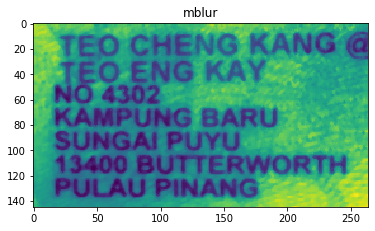

otsu blur, otsu add, diff:  85.0 80.0 5.0
address:  KANG
se be



In [338]:
print('width scale: ', width_scale)
width_scale = 2
blur = cv2.GaussianBlur(nameAddress, (7,5), 0)
#blur = cv2.blur(nameAddress,(5,5))+
mblur = cv2.medianBlur(nameAddress,3)
imshow(mblur,'mblur')
otsu = cv2.threshold(blur, 0, 255, cv2.THRESH_OTSU)[0]
otsu2 = cv2.threshold(nameAddress, 0, 255, cv2.THRESH_OTSU)[0]
print('otsu blur, otsu add, diff: ', otsu, otsu2, otsu-otsu2)
## OTSU HIGHER, IMAGE LIGHTER
## otsu blur, otsu add 126.0 110.0
## otsu blur, otsu add, diff:  152.0 139.0 13.0 001
## otsu blur, otsu add, diff:  85.0 80.0 5.0 002
## otsu blur, otsu add, diff:  86.0 80.0 6.0
print('address: ' ,pytesseract.image_to_string(blur,config = custom_config, lang = 'eng+msa'))

In [339]:
def denoise2(src, base_kernel=23, scale=1, base_sigma=8):
    kernel_size = (base_kernel * scale) + (1 if scale % 2 == 0 else 0)
    sigma = base_sigma * scale
    thresh = cv2.adaptiveThreshold(src,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,kernel_size, sigma)
    return cv2.fastNlMeansDenoising(thresh, None, 21, 7, 21)

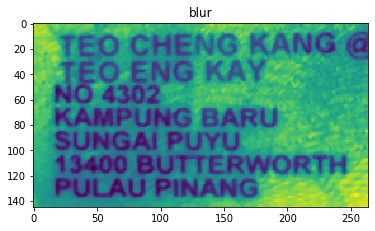

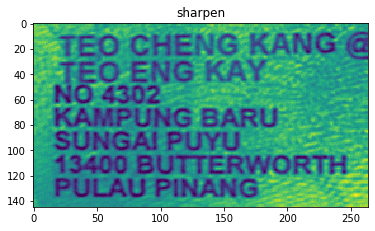

sharpen:  TEO CHENG KANG G
ioe ENG KAY

4302
KAMPUNG BARU
13400 BUTTERWORTH
PULAU PINANG



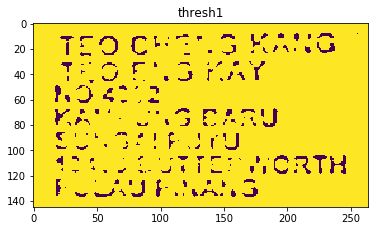

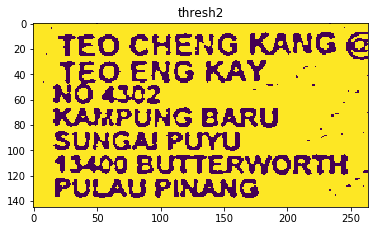

address:  TEO CHES KANG
TROLS HAY
ROT?

KAU. ONG EARY
SVT Re
Alte LUTTEM WORTH
BOLAU EMANGS

address 2:  TEO CHENG KANG @
ne. ENG KAY. ~
4352 : .
KAMPUNG BARU _~
SUNGAJ PUYU -
13400 BUTTERWORTH
PULAU PINANG. -



In [340]:
imshow(mblur,'blur')
sharpen = img_util.sharpen(blur)
imshow(sharpen,'sharpen')
print('sharpen: ' ,pytesseract.image_to_string(sharpen,config = custom_config, lang = 'eng+msa'))
# 27, 17
# 29, 17
thresh1 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,21, 17)
#thresh1 = cv2.fastNlMeansDenoising(thresh1, None, 31, 7, 31)
imshow(thresh1,'thresh1')
thresh2 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,21, 7)
#thresh2 = cv2.fastNlMeansDenoising(thresh2, None, 31, 7, 21)
imshow(thresh2,'thresh2')

#denoise = denoise2(blur,base_kernel=11, scale=1, base_sigma=5)
#imshow(denoise,'denoise')
custom_config = r'--oem 3 --psm 6'
print('address: ' ,pytesseract.image_to_string(thresh1,config = custom_config))
print('address 2: ' ,pytesseract.image_to_string(thresh2,config = custom_config))

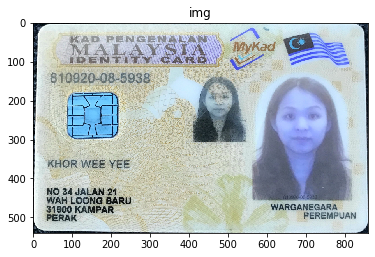

cx: 37, cy: 49, cw: 133, ch: 121
0.9918032786885246


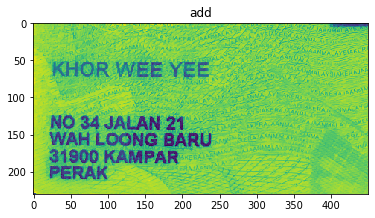

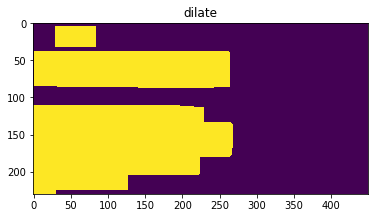

cx: 0, cy: 111, cw: 268, ch: 119
cx: 1, cy: 39, cw: 263, ch: 49


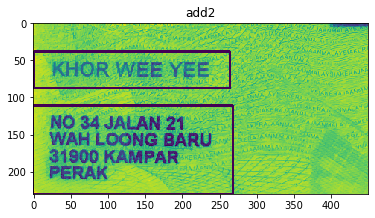

In [346]:
#img_file = os.path.join(TEST_IMAGE_PATH,'(9)00427.jpg')
img_file = '/home/williamkhoo/Desktop/projects/clean_data/ocr_test/025.jpg'
image = cv2.imread(img_file, cv2.IMREAD_COLOR)
image = img_util.try_crop_image(image, threshold=0.3, iterations=3)
height_scale, width_scale = getScale(image)
#print('image scale ', width_scale)
img = cv2.resize(image,(860,540),cv2.INTER_AREA)
#card = img[0:330,0:300]
imshow(img, 'img')
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
standard_chip_height = 122
#imshow(gray, 'gray')
y1 = 130
y2 = 350
x1 = 50
x2 = 400
card = gray[y1:y2,x1:x2]
#imshow(card, 'card')
cx1,cy1,cw1,ch1 = detect_chip(card)
print('cx: {}, cy: {}, cw: {}, ch: {}'.format(cx1,cy1,cw1,ch1))
cropped = card[cy1:cy1+ch1,cx1:cx1+cw1]
print(ch1/standard_chip_height)
#imshow(cropped, 'cropped')
y_start = y1+cy1+ch1
x_start = x1+cx1-75
x_start = x_start if x_start > 0 else 0
add = gray[y_start:y_start+230, x_start:x_start+450]
add2 = add.copy()
add3 = add.copy()
imshow(add, 'add')
blur = cv2.GaussianBlur(add2, (9,9), 0)
#imshow(blur, 'blur')
#sharpen = img_util.sharpen(blur)
#imshow(sharpen, 'sharpen')
thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,8)
#imshow(thresh, 'thresh')
thresh = cv2.fastNlMeansDenoising(thresh, None, 11,7,21)

# Remove horizontal lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15,1))
detect_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(detect_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(thresh, [c], -1, 0, 3)

# Remove vertical lines
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,15))
detect_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
cnts = cv2.findContours(detect_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(thresh, [c], -1, 0, 3)
#imshow(thresh, 'remove lines')    
#thresh = cv2.fastNlMeansDenoising(thresh, None, 51,7,31)
#imshow(thresh, 'thresh')
# Dilate to combine adjacent text contours
#kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (35,21))
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (28,15))
dilate = cv2.dilate(thresh, kernel, iterations=1)
imshow(dilate, 'dilate')

cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
contours = []
last_cnt = None
max_area = x = y = w = h = 0

for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    area = cv2.contourArea(c)
    if w >= 100 and h >= 30:
      print('cx: {}, cy: {}, cw: {}, ch: {}'.format(x,y,w,h))
      cv2.rectangle(add2, (x, y), (x + w, y + h), (0, 255, 0), 2)  
    if area > max_area:
      x1, y1, w1, h1 = cv2.boundingRect(c)  
      max_area = area
        
imshow(add2,'add2')  
nameAddress = add[y1:y1+h1,x1:x1+w1]